In [29]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn
from scipy import stats
from scipy.optimize import curve_fit
def function(x,*p): #
    a, b = p
    
    return a * x + b

In [30]:
df=pd.read_csv("Laser_A_I.csv")
df["Uncert I in mA"]=0.1*np.ones(len(df["Strom/mA"]))
tempArray=np.concatenate((0.01*np.ones(3), 0.1*np.ones(14), 1*np.ones(13)))
df["Uncert P in microW"]=tempArray
print(df.to_string())

    Strom/mA  Leistung/microW  Uncert I in mA  Uncert P in microW
0        0.0             2.03             0.1                0.01
1        3.0             5.39             0.1                0.01
2        6.4            10.39             0.1                0.01
3        7.6            12.40             0.1                0.10
4        9.4            15.50             0.1                0.10
5       11.8            20.10             0.1                0.10
6       15.1            27.10             0.1                0.10
7       18.0            34.20             0.1                0.10
8       21.0            42.30             0.1                0.10
9       24.0            50.90             0.1                0.10
10      27.0            61.50             0.1                0.10
11      30.1            74.60             0.1                0.10
12      33.1            90.80             0.1                0.10
13      34.5           101.60             0.1                0.10
14      36

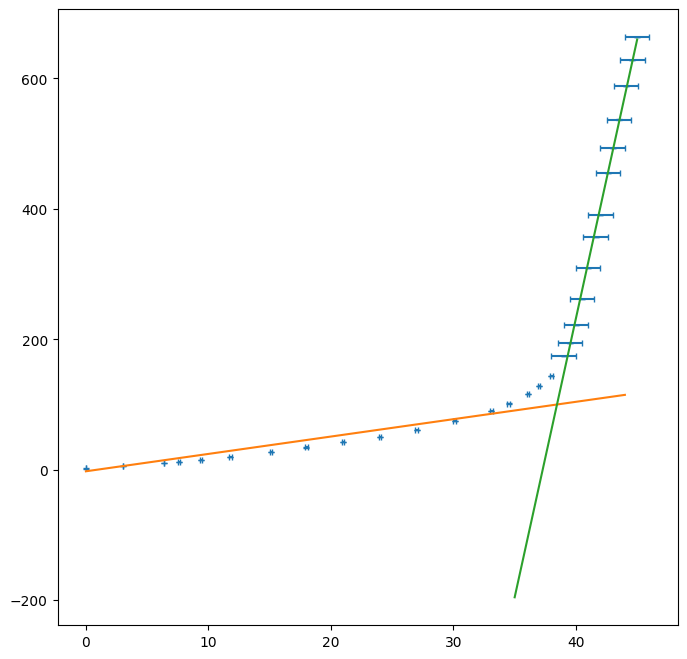

In [38]:
#plt.errorbar(df["Strom/mA"], df["Leistung/microW"], df["Uncert P in microW"], df["Uncert I in mA"], fmt='none')
fig, axs = plt.subplots(1,1,figsize=(8, 8))

axs.errorbar(df["Strom/mA"], df["Leistung/microW"], df["Uncert I in mA"], df["Uncert P in microW"],linestyle='none',capsize = 2)
InitialValues = [1,0]

OptimalValues, CovarianceMatrix = curve_fit(function,df["Strom/mA"][:17],df["Leistung/microW"][:17],sigma = df["Uncert P in microW"][:17],p0 = InitialValues)
axs.plot(np.arange(0.0,45,1.0),function(np.arange(0.0,45,1.0),*OptimalValues), label = 'fit')

OptimalValues, CovarianceMatrix = curve_fit(function,df["Strom/mA"][17:],df["Leistung/microW"][17:],sigma = df["Uncert P in microW"][17:],p0 = InitialValues)
axs.plot(np.arange(35,46,1.0),function(np.arange(35,46,1.0),*OptimalValues), label = 'fit')
plt.show()